# Neural network for Breast Cancer Classification

### Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

#### Data Pre-processing

In [2]:
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [3]:
# loading data to dataframe 
df = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [4]:
df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [5]:
# adding target column to dataframe
df["label"] = breast_cancer_dataset.target

In [6]:
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [11]:
#df.shape

In [13]:
# getting information of dataset
#df.info()

In [14]:
# checking null values
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [23]:
# distribution of data
df["label"].value_counts()

1    357
0    212
Name: label, dtype: int64

In [24]:
# mean values
df.groupby("label").mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [25]:
# separating features and target
X = df.drop(columns = "label", axis = 1)
Y = df["label"]

In [26]:
print(X)
print(Y)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0         17.990         10.38          122.80     1001.0          0.11840   
1         20.570         17.77          132.90     1326.0          0.08474   
2         19.690         21.25          130.00     1203.0          0.10960   
3         11.420         20.38           77.58      386.1          0.14250   
4         20.290         14.34          135.10     1297.0          0.10030   
5         12.450         15.70           82.57      477.1          0.12780   
6         18.250         19.98          119.60     1040.0          0.09463   
7         13.710         20.83           90.20      577.9          0.11890   
8         13.000         21.82           87.50      519.8          0.12730   
9         12.460         24.04           83.97      475.9          0.11860   
10        16.020         23.24          102.70      797.8          0.08206   
11        15.780         17.89          103.60      781.0       

#### Data Standardization

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

In [29]:
standardized_data = scaler.fit_transform(X)

In [30]:
print(standardized_data)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


In [31]:
# updating features with standardized data
X = standardized_data
print(X)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


In [32]:
print(Y)

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     1
20     1
21     1
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
539    1
540    1
541    1
542    1
543    1
544    1
545    1
546    1
547    1
548    1
549    1
550    1
551    1
552    1
553    1
554    1
555    1
556    1
557    1
558    1
559    1
560    1
561    1
562    0
563    0
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int32


### Split Train and Test data

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [34]:
print("Total data: ", X.shape)
print("Train data: ", X_train.shape)
print("Test data: ", X_test.shape)

Total data:  (569, 30)
Train data:  (455, 30)
Test data:  (114, 30)


### Building Neural Network

#### Importing Tensorflow and Keras

In [35]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [36]:
# setting up the layers of Neural Network

model = keras.Sequential([
    
    keras.layers.Flatten(input_shape = (30,)),
    keras.layers.Dense(20, activation = 'relu'),
    keras.layers.Dense(2, activation = "sigmoid")
])

In [37]:
# compiling the Neural Network

model.compile(optimizer = "adam",
             loss = "sparse_categorical_crossentropy",
             metrics = ["accuracy"])

In [38]:
# training the Neural Network

history = model.fit(X_train, Y_train, validation_split = 0.1, epochs = 10)

Epoch 1/10
13/13 [==============================] - 1s 25ms/step - loss: 0.6775 - accuracy: 0.5355 - val_loss: 0.5186 - val_accuracy: 0.7391
Epoch 2/10
13/13 [==============================] - 0s 5ms/step - loss: 0.4649 - accuracy: 0.8020 - val_loss: 0.3837 - val_accuracy: 0.8913
Epoch 3/10
13/13 [==============================] - 0s 5ms/step - loss: 0.3495 - accuracy: 0.8998 - val_loss: 0.3057 - val_accuracy: 0.8913
Epoch 4/10
13/13 [==============================] - 0s 5ms/step - loss: 0.2802 - accuracy: 0.9315 - val_loss: 0.2558 - val_accuracy: 0.9130
Epoch 5/10
13/13 [==============================] - 0s 5ms/step - loss: 0.2311 - accuracy: 0.9511 - val_loss: 0.2229 - val_accuracy: 0.9130
Epoch 6/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1980 - accuracy: 0.9560 - val_loss: 0.1993 - val_accuracy: 0.9130
Epoch 7/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1735 - accuracy: 0.9584 - val_loss: 0.1819 - val_accuracy: 0.9348
Epoch 8/10
13/13 [=

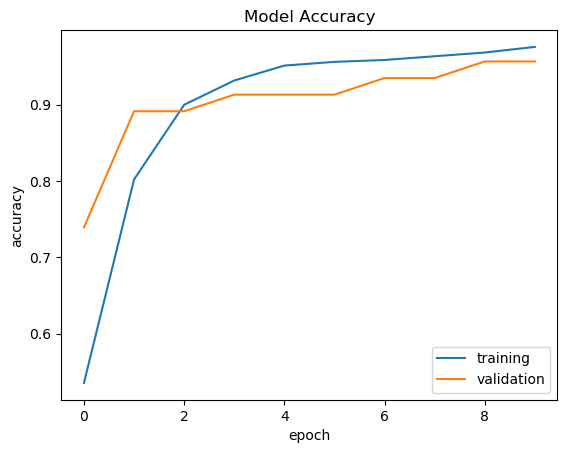

In [39]:
# visualize train validation accuracy

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

plt.title("Model Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")

plt.legend(["training", "validation"], loc = "lower right")

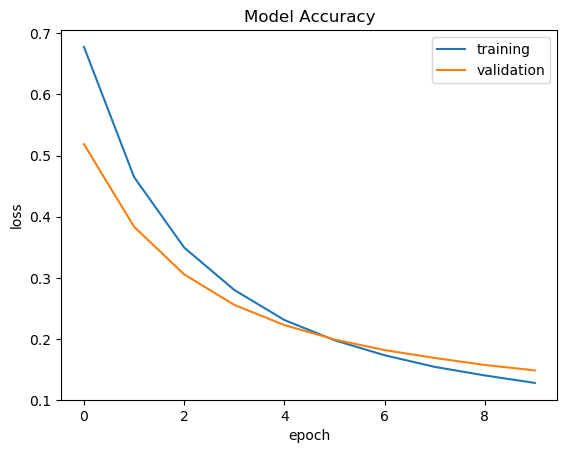

In [40]:
# visualize train validation loss

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title("Model Accuracy")
plt.ylabel("loss")
plt.xlabel("epoch")

plt.legend(["training", "validation"], loc = "upper right")

### Accuracy on test data

In [41]:
loss, accuracy = model.evaluate(X_test, Y_test)

4/4 [==============================] - 0s 5ms/step - loss: 0.1269 - accuracy: 0.9737


In [42]:
print(accuracy)

0.9736841917037964


In [43]:
print(X_test.shape)

(114, 30)


In [44]:
print(X_test[0])

[-0.05319351 -1.42408329 -0.06833592 -0.17260604  2.02392516 -0.1286992
  0.15317924  0.44445235  0.60014708  0.25125475  0.50863855  2.57300558
  0.60638318  0.09687179  0.99971423  0.3907719   0.52176832  2.71439431
 -0.41073446  0.65554594 -0.3415184  -1.67683887 -0.3795077  -0.3995439
  0.30822795 -0.74978636 -0.55789673 -0.19956318 -1.19838023 -0.63261684]


In [45]:
Y_pred = model.predict(X_test)

4/4 [==============================] - 0s 6ms/step


In [46]:
print(Y_pred.shape)

(114, 2)


In [47]:
print(Y_pred)

[[3.40101898e-01 6.24434054e-01]
 [3.43865275e-01 5.38065255e-01]
 [7.28008300e-02 7.94510841e-01]
 [9.96305466e-01 2.59335240e-04]
 [3.68899882e-01 4.87660617e-01]
 [9.70341265e-01 8.63449927e-03]
 [2.19264418e-01 5.32280624e-01]
 [4.57252301e-02 8.82476211e-01]
 [8.18966478e-02 5.30627549e-01]
 [6.48098066e-02 8.47787917e-01]
 [4.45522398e-01 4.15104419e-01]
 [3.07865620e-01 5.03722489e-01]
 [2.67684370e-01 5.21433830e-01]
 [2.31760487e-01 5.36237895e-01]
 [5.30333333e-02 5.81316233e-01]
 [7.85480857e-01 2.40787178e-01]
 [1.16508290e-01 8.20429206e-01]
 [1.04422055e-01 8.56315792e-01]
 [5.54734766e-02 7.46385276e-01]
 [9.50107932e-01 1.71598680e-02]
 [3.57294202e-01 7.94005990e-01]
 [1.44203931e-01 9.12876129e-01]
 [1.12202197e-01 8.01365018e-01]
 [4.61399369e-02 8.34605098e-01]
 [2.46463671e-01 6.64816618e-01]
 [9.35475886e-01 1.00234732e-01]
 [2.19453350e-01 8.04471374e-01]
 [3.81296068e-01 7.46580064e-01]
 [8.11745584e-01 2.31696889e-01]
 [9.02673602e-01 1.16796568e-01]
 [2.287625

In [48]:
# converting the prediction probability to class labels
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0]


### Predictive System

#### taking data directly from dataset so we need to do some preprocessing

In [51]:
sample = df.drop("label", axis = 1).iloc[0].values

In [52]:
input_data = (sample)
print(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data.reshape(1, -1)

# standardize the input data as model is trained as such
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = model.predict(std_data)
print(prediction)


[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
[[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633  3.28351467
   2.65287398  2.53247522  2.21751501  2.25574689  2.48973393 -0.56526506
   2.83303087  2.48757756 -0.21400165  1.31686157  0.72402616  0.66081994
   1.14875667  0.90708308  1.88668963 -1.35929347  2.30360062  2.00123749
   1.30768627  2.61666502  2.10952635  2.29607613  2.75062224  1.93701461]]
1/1 [==============================] - 0s 22ms/step
[[0.94800764 0.02107657]]


In [53]:
predictin_label = [np.argmax(prediction)]
print(predictin_label)

if(predictin_label[0] == 0):
    print("The tumor is Malignant.")
else:
    print("The tumor is Benign.")

[0]
The tumor is Malignant.


##### data was standardised before split so we can use it directly after reshaping

In [54]:
input_data = X_test[0]
print(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data.reshape(1, -1)

print(input_data_reshaped)

prediction = model.predict(input_data_reshaped)
print(prediction)

[-0.05319351 -1.42408329 -0.06833592 -0.17260604  2.02392516 -0.1286992
  0.15317924  0.44445235  0.60014708  0.25125475  0.50863855  2.57300558
  0.60638318  0.09687179  0.99971423  0.3907719   0.52176832  2.71439431
 -0.41073446  0.65554594 -0.3415184  -1.67683887 -0.3795077  -0.3995439
  0.30822795 -0.74978636 -0.55789673 -0.19956318 -1.19838023 -0.63261684]
[[-0.05319351 -1.42408329 -0.06833592 -0.17260604  2.02392516 -0.1286992
   0.15317924  0.44445235  0.60014708  0.25125475  0.50863855  2.57300558
   0.60638318  0.09687179  0.99971423  0.3907719   0.52176832  2.71439431
  -0.41073446  0.65554594 -0.3415184  -1.67683887 -0.3795077  -0.3995439
   0.30822795 -0.74978636 -0.55789673 -0.19956318 -1.19838023 -0.63261684]]
1/1 [==============================] - 0s 26ms/step
[[0.3401019 0.6244341]]


In [55]:
predictin_label = [np.argmax(prediction)]
print(predictin_label)

if(predictin_label[0] == 0):
    print("The tumor is Malignant.")
else:
    print("The tumor is Benign.")

[1]
The tumor is Benign.


#### The model is ready now